In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

custom_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":12.0,
                 "legend.frameon":False,
                 "legend.labelspacing":0}

sns.set_theme(style='ticks', rc=custom_params)

### Ground State Distribution Testing
Testing all methods: CMD, PIMD, CMD+GLE & PI+GLE

Additionally testing number of beads (paths) required for PIMD & PI+GLE

In [2]:
def Import_Angles(directory):
    # Get list of file names in the directory
    file_names = os.listdir(directory)
    imports = []
    # Import each file
    for file_name in file_names:
        # Remove file extension
        module_name = os.path.splitext(file_name)[0]
        imports.append(module_name)
        # Import file
        globals()[module_name] = pd.read_csv(os.path.join(directory, file_name), delim_whitespace=True, header=None, names=['HOH', 'Count'])
    return imports

def Import_BondLengths(directory):
    # Get list of file names in the directory
    file_names = os.listdir(directory)
    imports = []
    # Import each file
    for file_name in file_names:
        # Remove file extension
        module_name = os.path.splitext(file_name)[0]
        imports.append(module_name)
        # Import file
        globals()[module_name] = pd.read_csv(os.path.join(directory, file_name), delim_whitespace=True, header=None, names=['rOH', 'Count'])
        globals()[module_name] = globals()[module_name].sort_values('rOH', ascending=True)
    return imports

In [3]:
imported_angles = []
locs = ['CMD', 'CMD_QT', 'PIGLE_2', 'PIGLE_4', 'PIGLE_8', 'PIMD_4', 'PIMD_8', 'PIMD_16', 'PIMD_32']
for loc in locs:
    imported_angles.append(Import_Angles('Data\Angles\qTIP4P\{}'.format(loc)))
for sublist in imported_angles:
    print(sublist)

['CMD_ang_1000', 'CMD_ang_300', 'CMD_ang_500']
['CMD_QT_ang_1000', 'CMD_QT_ang_300', 'CMD_QT_ang_500']
['PIGLE_2_ang_1000', 'PIGLE_2_ang_500', 'PIGLE_2_noPAPER_ang_300', 'PIGLE_2_PAPER_ang_300']
['PIGLE_4_ang_1000', 'PIGLE_4_ang_300', 'PIGLE_4_ang_500']
['PIGLE_8_ang_300']
['PIMD_4_ang_1000', 'PIMD_4_ang_300', 'PIMD_4_ang_500']
['PIMD_8_ang_1000', 'PIMD_8_ang_300', 'PIMD_8_ang_500']
['PIMD_16_ang_1000', 'PIMD_16_ang_300', 'PIMD_16_ang_500']
['PIMD_32_ang_1000', 'PIMD_32_ang_300', 'PIMD_32_ang_500']


In [4]:
imported_lengths = []
locs = ['CMD', 'CMD_QT', 'PIGLE_2', 'PIGLE_4', 'PIGLE_8', 'PIMD_4', 'PIMD_8', 'PIMD_16', 'PIMD_32']
for loc in locs:
    imported_lengths.append(Import_BondLengths('Data\Bond_Lengths\qTIP4P\{}'.format(loc)))
for sublist in imported_lengths:
    print(sublist)

['CMD_dist_1000', 'CMD_dist_300', 'CMD_dist_500']
['CMD_QT_dist_1000', 'CMD_QT_dist_300', 'CMD_QT_dist_500']
['PIGLE_2_dist_1000', 'PIGLE_2_dist_500', 'PIGLE_2_noPAPER_dist_300', 'PIGLE_2_PAPER_dist_300']
['PIGLE_4_dist_1000', 'PIGLE_4_dist_300', 'PIGLE_4_dist_500']
['PIGLE_8_dist_300']
['PIMD_4_dist_1000', 'PIMD_4_dist_300', 'PIMD_4_dist_500']
['PIMD_8_dist_1000', 'PIMD_8_dist_300', 'PIMD_8_dist_500']
['PIMD_16_dist_1000', 'PIMD_16_dist_300', 'PIMD_16_dist_500']
['PIMD_32_dist_1000', 'PIMD_32_dist_300', 'PIMD_32_dist_500']


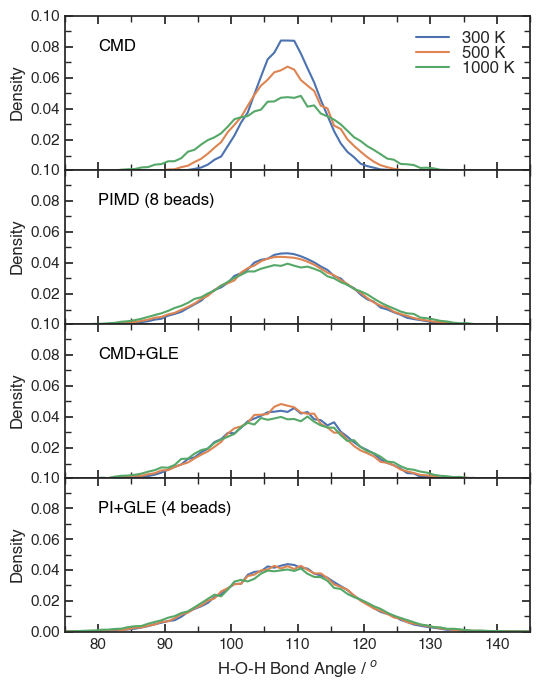

In [5]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(6,8))

methods_list = ['CMD', 'PIMD (8 beads)', 'CMD+GLE', 'PI+GLE (4 beads)']

# Plot for CMD
axs[0].plot(CMD_ang_300['HOH'], CMD_ang_300['Count'], label='300 K')
axs[0].plot(CMD_ang_500['HOH'], CMD_ang_500['Count'], label='500 K')
axs[0].plot(CMD_ang_1000['HOH'], CMD_ang_1000['Count'], label='1000 K')
axs[0].legend(frameon=False, labelspacing=0, fontsize=12)

# Plot for PIMD_8
axs[1].plot(PIMD_8_ang_300['HOH'], PIMD_8_ang_300['Count'], label='300 K')
axs[1].plot(PIMD_8_ang_500['HOH'], PIMD_8_ang_500['Count'], label='500 K')
axs[1].plot(PIMD_8_ang_1000['HOH'], PIMD_8_ang_1000['Count'], label='1000 K')

# Plot for CMD_QT
axs[2].plot(CMD_QT_ang_300['HOH'], CMD_QT_ang_300['Count'], label='300 K')
axs[2].plot(CMD_QT_ang_500['HOH'], CMD_QT_ang_500['Count'], label='500 K')
axs[2].plot(CMD_QT_ang_1000['HOH'], CMD_QT_ang_1000['Count'], label='1000 K')

# Plot for PIGLE_4
axs[3].plot(PIGLE_4_ang_300['HOH'], PIGLE_4_ang_300['Count'], label='300 K')
axs[3].plot(PIGLE_4_ang_500['HOH'], PIGLE_4_ang_500['Count'], label='500 K')
axs[3].plot(PIGLE_4_ang_1000['HOH'], PIGLE_4_ang_1000['Count'], label='1000 K')
axs[3].set_xlabel(r'H-O-H Bond Angle / $^o$', fontsize=12)
axs[3].set_ylim(0, 0.1)


for x in range(3): axs[x].set_ylim(0.001, 0.1)
for x in range(4):
    axs[x].set_xlim(75, 145)
    axs[x].set_ylabel('Density', fontsize=12)
    axs[x].xaxis.set_minor_locator(MultipleLocator(5))
    axs[x].yaxis.set_minor_locator(MultipleLocator(0.01))
    axs[x].text(80, 0.075, methods_list[x], ha='left', va='bottom', fontsize=12, color='black')
    
plt.subplots_adjust(hspace=0)
plt.savefig('Plots/BondAngle_Final.png', dpi=200)


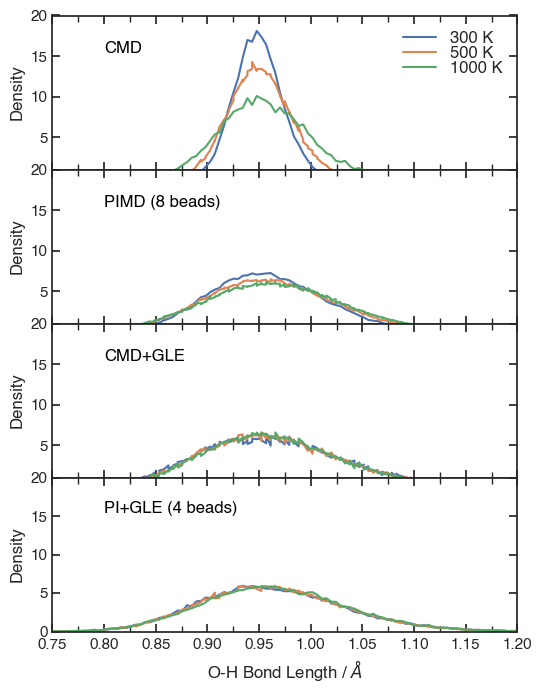

In [6]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(6,8))

methods_list = ['CMD', 'PIMD (8 beads)', 'CMD+GLE', 'PI+GLE (4 beads)']

# Plot for CMD
axs[0].plot(CMD_dist_300['rOH'], CMD_dist_300['Count'], label='300 K')
axs[0].plot(CMD_dist_500['rOH'], CMD_dist_500['Count'], label='500 K')
axs[0].plot(CMD_dist_1000['rOH'], CMD_dist_1000['Count'], label='1000 K')
axs[0].legend(frameon=False, labelspacing=0, fontsize=12)

# Plot for PIMD_8
axs[1].plot(PIMD_8_dist_300['rOH'], PIMD_8_dist_300['Count'], label='300 K')
axs[1].plot(PIMD_8_dist_500['rOH'], PIMD_8_dist_500['Count'], label='500 K')
axs[1].plot(PIMD_8_dist_1000['rOH'], PIMD_8_dist_1000['Count'], label='1000 K')

# Plot for CMD_QT
axs[2].plot(CMD_QT_dist_300['rOH'], CMD_QT_dist_300['Count'], label='300 K')
axs[2].plot(CMD_QT_dist_500['rOH'], CMD_QT_dist_500['Count'], label='500 K')
axs[2].plot(CMD_QT_dist_1000['rOH'], CMD_QT_dist_1000['Count'], label='1000 K')

# Plot for PIGLE_4
axs[3].plot(PIGLE_4_dist_300['rOH'], PIGLE_4_dist_300['Count'], label='300 K')
axs[3].plot(PIGLE_4_dist_500['rOH'], PIGLE_4_dist_500['Count'], label='500 K')
axs[3].plot(PIGLE_4_dist_1000['rOH'], PIGLE_4_dist_1000['Count'], label='1000 K')
axs[3].set_xlabel(r'O-H Bond Length / $\AA$', fontsize=12)
axs[3].set_ylim(0, 20)

for x in range(3): axs[x].set_ylim(1, 20)
for x in range(4):
    axs[x].set_xlim(0.75, 1.2)
    axs[x].set_ylabel('Density', fontsize=12)
    axs[x].xaxis.set_minor_locator(MultipleLocator(0.025))
    axs[x].yaxis.set_minor_locator(MultipleLocator(5))
    axs[x].text(0.8, 15, methods_list[x], ha='left', va='bottom', fontsize=12, color='black')
    
plt.subplots_adjust(hspace=0)
plt.savefig('Plots/BondDistance_Final.png', dpi=200)


### Presentation Plots

In [7]:
custom_params = {"axes.labelsize": 16.0,
                 "xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "xtick.labelsize":16.0,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "ytick.labelsize":16.0,
                 "font.family":"Helvetica",
                 "font.size":16.0,
                 "lines.linewidth":2,
                 "legend.frameon":False,
                 "legend.labelspacing":0,
                 "legend.borderpad":0.5,
                 "legend.fontsize":16.0}

sns.set_theme(style='ticks', rc=custom_params)

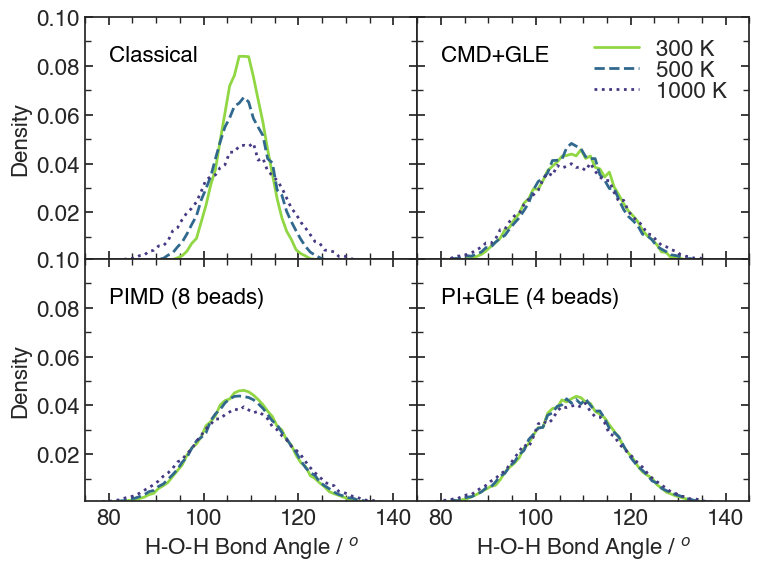

In [8]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,6))

methods_list = ['Classical', 'PIMD (8 beads)', 'CMD+GLE', 'PI+GLE (4 beads)']

# Plot for CMD
axs[0][0].plot(CMD_ang_300['HOH'], CMD_ang_300['Count'], label='300 K', color='#90d743')
axs[0][0].plot(CMD_ang_500['HOH'], CMD_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
axs[0][0].plot(CMD_ang_1000['HOH'], CMD_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
axs[0][0].set_ylabel('Density', fontsize=16)
axs[0][0].text(80, 0.08, methods_list[0], ha='left', va='bottom', fontsize=16, color='black')

# Plot for PIMD_8
axs[1][0].plot(PIMD_8_ang_300['HOH'], PIMD_8_ang_300['Count'], label='300 K', color='#90d743')
axs[1][0].plot(PIMD_8_ang_500['HOH'], PIMD_8_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
axs[1][0].plot(PIMD_8_ang_1000['HOH'], PIMD_8_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
axs[1][0].set_ylabel('Density', fontsize=16)
axs[1][0].text(80, 0.08, methods_list[1], ha='left', va='bottom', fontsize=16, color='black')
axs[1][0].set_xlabel(r'H-O-H Bond Angle / $^o$')


# Plot for CMD_QT
axs[0][1].plot(CMD_QT_ang_300['HOH'], CMD_QT_ang_300['Count'], label='300 K', color='#90d743')
axs[0][1].plot(CMD_QT_ang_500['HOH'], CMD_QT_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
axs[0][1].plot(CMD_QT_ang_1000['HOH'], CMD_QT_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
axs[0][1].text(80, 0.08, methods_list[2], ha='left', va='bottom', fontsize=16, color='black')
axs[0][1].legend(frameon=False, labelspacing=0)

# Plot for PIGLE_4
axs[1][1].plot(PIGLE_4_ang_300['HOH'], PIGLE_4_ang_300['Count'], label='300 K', color='#90d743')
axs[1][1].plot(PIGLE_4_ang_500['HOH'], PIGLE_4_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
axs[1][1].plot(PIGLE_4_ang_1000['HOH'], PIGLE_4_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
axs[1][1].set_xlabel(r'H-O-H Bond Angle / $^o$')
axs[1][1].set_ylim(0, 0.1)
axs[1][1].text(80, 0.08, methods_list[3], ha='left', va='bottom', color='black')

for x in range(2):
    for y in range(2):
        axs[x][y].set_xlim(75, 145)
        axs[x][y].xaxis.set_minor_locator(MultipleLocator(5))
        axs[x][y].yaxis.set_minor_locator(MultipleLocator(0.01))


for x in range(2): axs[x][0].set_ylim(0.001, 0.1)

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('Plots/Presentation/BondAngle_Presentation.png', dpi=200)

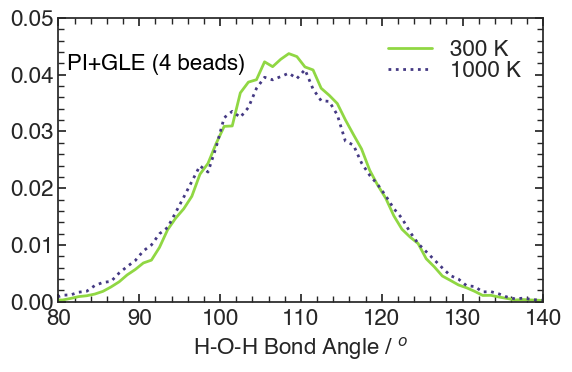

In [9]:
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(6,4))
ax.plot(PIGLE_4_ang_300['HOH'], PIGLE_4_ang_300['Count'], label='300 K', color='#90d743')
#ax.plot(PIGLE_4_ang_500['HOH'], PIGLE_4_ang_500['Count'], label='500 K', color='#31688e', linestyle='--')
ax.plot(PIGLE_4_ang_1000['HOH'], PIGLE_4_ang_1000['Count'], label='1000 K', color='#443983', linestyle=':')
ax.set_xlabel(r'H-O-H Bond Angle / $^o$')
ax.set_xlim(80,140)
ax.set_ylim(0, 0.05)
ax.text(81, 0.04, methods_list[3], ha='left', va='bottom', color='black')
plt.legend()
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('Plots/Presentation/BondAngle_Presentation_PIGLE.png', dpi=200)

### Thesis Plots

In [10]:
custom_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":12.0,
                 "legend.frameon":False,
                 "legend.labelspacing":0,
                 "legend.fontsize":12.0}

sns.set_theme(style='ticks', rc=custom_params)

In [11]:
def two_plot_labels():
    axs[0].set_xlim(75,145)
    axs[1].set_xlim(0.65, 1.25)
    
    axs[0].set_xlabel(r'H-O-H Bond Angle / $^o$')
    axs[1].set_xlabel(r'O-H Bond Length / $\AA$')
    
    axs[0].set_ylabel('Density')
    axs[1].set_ylabel('Density')

#### CMD vs PIMD

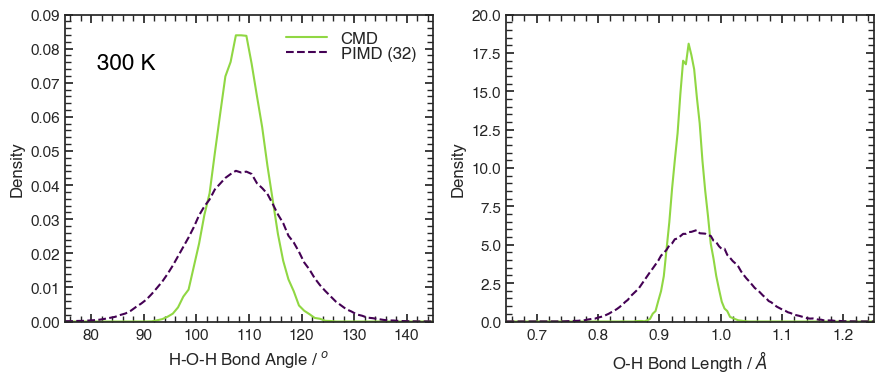

In [12]:
fig, axs = plt.subplots(1,2, figsize=(9,4))

sns.lineplot(data=CMD_ang_300, x='HOH', y='Count', ax=axs[0], color='#90d743', label='CMD')
sns.lineplot(data=PIMD_32_ang_300, x='HOH', y='Count', ax=axs[0], color='#440154', linestyle='--', label='PIMD (32)')

sns.lineplot(data=CMD_dist_300, x='rOH', y='Count', ax=axs[1], color='#90d743')
sns.lineplot(data=PIMD_32_dist_300, x='rOH', y='Count', ax=axs[1], color='#440154', linestyle='--')

two_plot_labels()
axs[0].set_ylim(0,0.09)
axs[1].set_ylim(0,20)

axs[0].text(81, 0.0725, '300 K', ha='left', va='bottom', color='black', fontsize=16)
axs[0].legend(handlelength=2.5)
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.savefig('Plots/Thesis/CMD_PIMD32_300K.png', dpi=200)

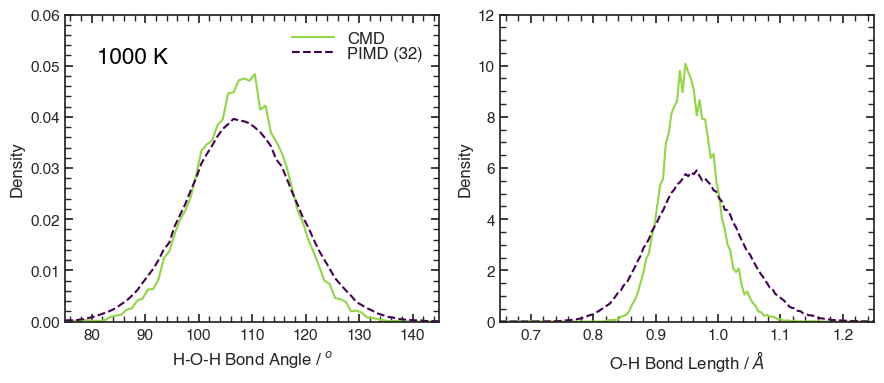

In [13]:
fig, axs = plt.subplots(1,2, figsize=(9,4))

sns.lineplot(data=CMD_ang_1000, x='HOH', y='Count', ax=axs[0], color='#90d743', label='CMD')
sns.lineplot(data=PIMD_32_ang_1000, x='HOH', y='Count', ax=axs[0], color='#440154', linestyle='--', label='PIMD (32)')

sns.lineplot(data=CMD_dist_1000, x='rOH', y='Count', ax=axs[1], color='#90d743')
sns.lineplot(data=PIMD_32_dist_1000, x='rOH', y='Count', ax=axs[1], color='#440154', linestyle='--')

two_plot_labels()
axs[0].set_ylim(0,0.06)
axs[1].set_ylim(0,12)

axs[0].text(81, 0.0495, '1000 K', ha='left', va='bottom', color='black', fontsize=16)
axs[0].legend(handlelength=2.5)
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.savefig('Plots/Thesis/CMD_PIMD32_1000K.png', dpi=200)

#### PIMD Convergence

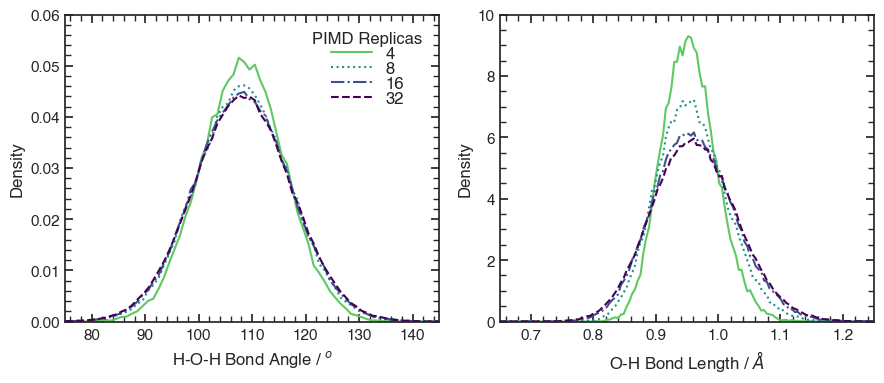

In [14]:
fig, axs = plt.subplots(1,2, figsize=(9,4))

sns.lineplot(data=PIMD_4_ang_300, x='HOH', y='Count', ax=axs[0], c='#5ec962', label='4')
sns.lineplot(data=PIMD_8_ang_300, x='HOH', y='Count', ax=axs[0], c='#21918c', linestyle=':', label='8')
sns.lineplot(data=PIMD_16_ang_300, x='HOH', y='Count', ax=axs[0], c='#3b528b', linestyle='-.', label='16')
sns.lineplot(data=PIMD_32_ang_300, x='HOH', y='Count', ax=axs[0], c='#440154', linestyle='--', label='32')

sns.lineplot(data=PIMD_4_dist_300, x='rOH', y='Count', ax=axs[1], c='#5ec962')
sns.lineplot(data=PIMD_8_dist_300, x='rOH', y='Count', ax=axs[1], c='#21918c', linestyle=':')
sns.lineplot(data=PIMD_16_dist_300, x='rOH', y='Count', ax=axs[1], c='#3b528b', linestyle='-.')
sns.lineplot(data=PIMD_32_dist_300, x='rOH', y='Count', ax=axs[1], c='#440154', linestyle='--')

two_plot_labels()
axs[0].set_ylim(0,0.06)
axs[1].set_ylim(0, 10)
axs[0].legend(title='PIMD Replicas', prop={'size':12}, handlelength=2.5)

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.savefig('Plots/Thesis/PIMD_Convergence.png', dpi=200)

### PIMD vs PI+GLE convergence

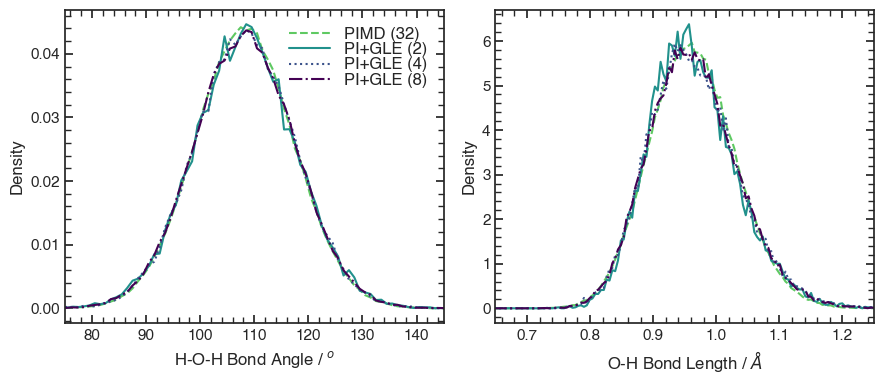

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))

sns.lineplot(data=PIMD_32_ang_300, x='HOH', y='Count', ax=axs[0], c='#5ec962', linestyle='--', label='PIMD (32)')
sns.lineplot(data=PIGLE_2_noPAPER_ang_300, x='HOH', y='Count', ax=axs[0], c='#21918c', label='PI+GLE (2)')
sns.lineplot(data=PIGLE_4_ang_300, x='HOH', y='Count', ax=axs[0], c='#3b528b', linestyle=':', label='PI+GLE (4)')
sns.lineplot(data=PIGLE_8_ang_300, x='HOH', y='Count', ax=axs[0], c='#440154', linestyle='-.', label='PI+GLE (8)')

sns.lineplot(data=PIMD_32_dist_300, x='rOH', y='Count', ax=axs[1], c='#5ec962', linestyle='--')
sns.lineplot(data=PIGLE_2_noPAPER_dist_300, x='rOH', y='Count', ax=axs[1], c='#21918c')
sns.lineplot(data=PIGLE_4_dist_300, x='rOH', y='Count', ax=axs[1], c='#3b528b', linestyle=':')
sns.lineplot(data=PIGLE_8_dist_300, x='rOH', y='Count', ax=axs[1], c='#440154', linestyle='-.')

two_plot_labels()
axs[0].legend(handlelength=2.5)
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.savefig('Plots/Thesis/PIMD_vs_PIGLE_Convergence.png', dpi=200)

### Temperature dependance

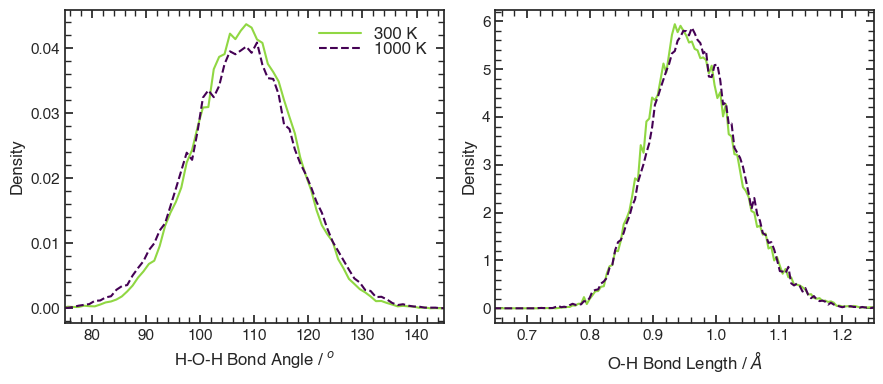

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(9,4))

sns.lineplot(data=PIGLE_4_ang_300, x='HOH', y='Count', ax=axs[0], c='#90d743', label='300 K')
sns.lineplot(data=PIGLE_4_ang_1000, x='HOH', y='Count', ax=axs[0], c='#440154', linestyle='--', label='1000 K')

sns.lineplot(data=PIGLE_4_dist_300, x='rOH', y='Count', ax=axs[1], c='#90d743')
sns.lineplot(data=PIGLE_4_dist_1000, x='rOH', y='Count', ax=axs[1], c='#440154', linestyle='--')

two_plot_labels()
axs[0].legend(handlelength=2.5)
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.savefig('Plots/Thesis/PIGLE_TempDep.png', dpi=200)